In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', None)  # Prevent wrapping
pd.set_option('display.max_colwidth', None)  # Display full content of each column

In [ ]:
dataset=pd.read_csv('Housing.csv')
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values
print(x)

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_hot_encode_cols=[11]
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),one_hot_encode_cols)],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 ... 'yes' 2 'yes']
 [1.0 0.0 0.0 ... 'yes' 3 'no']
 [0.0 1.0 0.0 ... 'no' 2 'yes']
 ...
 [0.0 0.0 1.0 ... 'no' 0 'no']
 [1.0 0.0 0.0 ... 'no' 0 'no']
 [0.0 0.0 1.0 ... 'no' 0 'no']]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label_encode_cols=[7,8,9,10,11,13]
for i in label_encode_cols:
  x[:,i]=le.fit_transform(x[:,i])
print(x)

[[1.0 0.0 0.0 ... 1 2 1]
 [1.0 0.0 0.0 ... 1 3 0]
 [0.0 1.0 0.0 ... 0 2 1]
 ...
 [0.0 0.0 1.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]]


In [ ]:
print(y)

[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  6440000  6419000  6405000  6300000  6300000  6300000
  6300000  6300000  6293000  6265000  6230000  6230000  6195000  6195000
  6195000  6160000  6160000  6125000  6107500  6090

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=1000,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
y_pred=regressor.predict(x_test)
y_pred=np.round(y_pred).astype(int)
print(y_pred)
print(y_test)

[4355183 5620027 4620354 5632935 3053931 6758482 3403182 3801105 3415699
 7991510 6243370 3956092 4264162 4730558 4367279 2388866 4376438 4165833
 3555500 3851222 7329144 6308960 4643516 2401728 6158698 5220345 5491010
 5200608 4405093 5915791 3623970 4701171 7639558 3295061 4751880 4879483
 5041225 4083492 3317307 3852538 8293895 6167046 6811550 3813240 4010923
 6524749 4557150 3312348 4782922 5356449 4212355 7025046 2694226 3634918
 3849590 4528234 7583711 4253221 3592400 4278936 4855025 6333856 3113005
 7393494 2950235 4616654 6907624 2897505 4562750 5108432 3800434 7543822
 4504805 5655748 4420874 4001649 3080658 8944814 3180489 4000697 3800434
 5028331 4442014 5918258 4029274 3902556 4446246 4752828 4028052 5256580
 3992184 5606531 3619404 3680851 3608513 9331416 3819984 7697428 3944696
 4310411 7661566 3794560 4205838 2750727 7228245 5122222 4072498 5311614
 6766668]
[ 4585000  6083000  4007500  6930000  2940000  6195000  3535000  2940000
  3500000  7980000  6755000  3990000  315

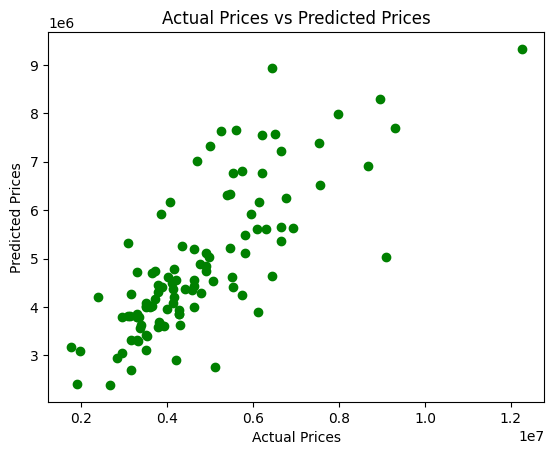

In [ ]:
plt.scatter(y_test,y_pred,color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.587777201350514